In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
pwd

'/Users/vasudev/Desktop/Projects/imc_prosperity/prosperity-imc25/rounds/round3/eda'

In [7]:
day_price_0_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_0.csv", delimiter=";")
day_price_1_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_1.csv", delimiter=";")
day_price_2_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_2.csv", delimiter=";")

# merge all the dataframes
merged_df = pd.concat([day_price_0_df, day_price_1_df, day_price_2_df])

In [ ]:
def calculate_spread(row):
    return row['ask_price_1'] - row['bid_price_1']

# define function to plot volatitlity
def calculate_volatility(data, window_size=20):
    # Calculate log returns
    log_returns = np.log(data['vwap']).diff()
    
    # Calculate rolling standard deviation of log returns
    volatility = log_returns.rolling(window=window_size).std()

    return volatility

Average mean reversion time: 2133.57 timesteps
Maximum deviation magnitude: 0.048884251385488846
Average deviation magnitude: 0.005595280226212094


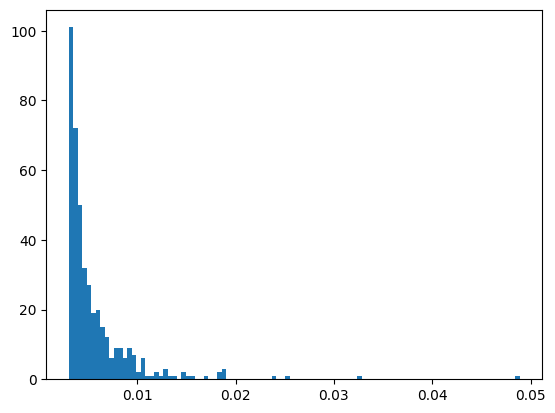

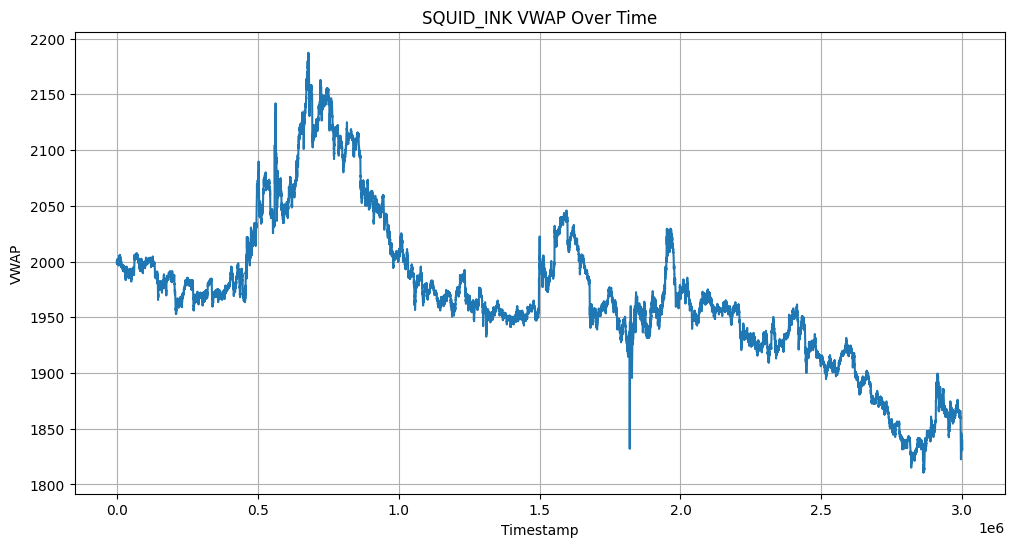

In [ ]:
# isolate the squid ink data - create a copy to avoid the warning
volcanic_rock_df = merged_df[merged_df["product"] == "SQUID_INK"].copy()

